In [3]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import shutil

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import BatchNormalization as BNP
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import seaborn as sns
from keras import applications
import efficientnet.keras as effnet
from keras import callbacks
from keras.models import Sequential
import random
import matplotlib.image as mpimg

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator as DGEN
from keras.optimizers import RMSprop, SGD, Adam
import keras

from sklearn.metrics import classification_report as CR
from keras.applications import VGG16
from keras.models import Model

In [4]:
path = 'facial disease/'
target = os.listdir(path)
target

['Beta_thalassemia-20220710T132615Z-001',
 'Down_Syndrome-20220710T132622Z-001',
 'Healthy-20220710T132625Z-001',
 'Hyperthyroidism-20220710T132628Z-001',
 'Leprosy-20220710T132631Z-001']

# Step 1- Extracting faces from the images

In [1]:
prototxt_path = 'deploy.prototxt'
model_path = 'weights.caffemodel'

In [2]:

extracted_images = 'dataset_faces'

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')

NameError: name 'cv2' is not defined

In [10]:
for root, dirs, files in os.walk(path):
    for dir1 in dirs:
        dpath = os.path.join(extracted_images,dir1)
        print(dpath)
        if not os.path.exists(dpath):
            print(dpath,"img does not not exist")
            os.makedirs(dpath)
    for file in files:
        imagename = os.path.join(root,file).replace('\\','/')
        dir1, dir2 = os.path.split(root)
        print("Test",dir1,dir2)
        print(imagename)
        
        image = cv2.imread(imagename)
        # Convert into grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Detect faces
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
            faces = image[y:y + h, x:x + w]
            mdir,sdir = os.path.split(root)
            finalimage = os.path.join(extracted_images,sdir,file)
            cv2.imwrite(finalimage, faces)

dataset_faces\Beta_thalassemia-20220710T132615Z-001
dataset_faces\Beta_thalassemia-20220710T132615Z-001 img does not not exist
dataset_faces\Down_Syndrome-20220710T132622Z-001
dataset_faces\Down_Syndrome-20220710T132622Z-001 img does not not exist
dataset_faces\Healthy-20220710T132625Z-001
dataset_faces\Healthy-20220710T132625Z-001 img does not not exist
dataset_faces\Hyperthyroidism-20220710T132628Z-001
dataset_faces\Hyperthyroidism-20220710T132628Z-001 img does not not exist
dataset_faces\Leprosy-20220710T132631Z-001
dataset_faces\Leprosy-20220710T132631Z-001 img does not not exist
dataset_faces\Beta_thalassemia
dataset_faces\Beta_thalassemia img does not not exist
Test facial disease/Beta_thalassemia-20220710T132615Z-001 Beta_thalassemia
facial disease/Beta_thalassemia-20220710T132615Z-001/Beta_thalassemia/1001.jpg
Test facial disease/Beta_thalassemia-20220710T132615Z-001 Beta_thalassemia
facial disease/Beta_thalassemia-20220710T132615Z-001/Beta_thalassemia/1002.jpg
Test facial dise

Test facial disease/Beta_thalassemia-20220710T132615Z-001 Beta_thalassemia
facial disease/Beta_thalassemia-20220710T132615Z-001/Beta_thalassemia/2040.jpg
Test facial disease/Beta_thalassemia-20220710T132615Z-001 Beta_thalassemia
facial disease/Beta_thalassemia-20220710T132615Z-001/Beta_thalassemia/2041.jpg
Test facial disease/Beta_thalassemia-20220710T132615Z-001 Beta_thalassemia
facial disease/Beta_thalassemia-20220710T132615Z-001/Beta_thalassemia/2042.jpg
Test facial disease/Beta_thalassemia-20220710T132615Z-001 Beta_thalassemia
facial disease/Beta_thalassemia-20220710T132615Z-001/Beta_thalassemia/2043.jpg
Test facial disease/Beta_thalassemia-20220710T132615Z-001 Beta_thalassemia
facial disease/Beta_thalassemia-20220710T132615Z-001/Beta_thalassemia/2044.jpg
Test facial disease/Beta_thalassemia-20220710T132615Z-001 Beta_thalassemia
facial disease/Beta_thalassemia-20220710T132615Z-001/Beta_thalassemia/2045.jpg
Test facial disease/Beta_thalassemia-20220710T132615Z-001 Beta_thalassemia
f

Test facial disease/Down_Syndrome-20220710T132622Z-001 Down_Syndrome
facial disease/Down_Syndrome-20220710T132622Z-001/Down_Syndrome/5037.jpg
Test facial disease/Down_Syndrome-20220710T132622Z-001 Down_Syndrome
facial disease/Down_Syndrome-20220710T132622Z-001/Down_Syndrome/5038.jpg
Test facial disease/Down_Syndrome-20220710T132622Z-001 Down_Syndrome
facial disease/Down_Syndrome-20220710T132622Z-001/Down_Syndrome/5039.jpg
Test facial disease/Down_Syndrome-20220710T132622Z-001 Down_Syndrome
facial disease/Down_Syndrome-20220710T132622Z-001/Down_Syndrome/5040.jpg
Test facial disease/Down_Syndrome-20220710T132622Z-001 Down_Syndrome
facial disease/Down_Syndrome-20220710T132622Z-001/Down_Syndrome/6001.jpg
Test facial disease/Down_Syndrome-20220710T132622Z-001 Down_Syndrome
facial disease/Down_Syndrome-20220710T132622Z-001/Down_Syndrome/6002.jpg
Test facial disease/Down_Syndrome-20220710T132622Z-001 Down_Syndrome
facial disease/Down_Syndrome-20220710T132622Z-001/Down_Syndrome/6003.jpg
Test f

Test facial disease/Healthy-20220710T132625Z-001 Healthy
facial disease/Healthy-20220710T132625Z-001/Healthy/9029.jpg
Test facial disease/Healthy-20220710T132625Z-001 Healthy
facial disease/Healthy-20220710T132625Z-001/Healthy/9030.jpg
Test facial disease/Healthy-20220710T132625Z-001 Healthy
facial disease/Healthy-20220710T132625Z-001/Healthy/9031.jpg
Test facial disease/Healthy-20220710T132625Z-001 Healthy
facial disease/Healthy-20220710T132625Z-001/Healthy/9032.jpg
Test facial disease/Healthy-20220710T132625Z-001 Healthy
facial disease/Healthy-20220710T132625Z-001/Healthy/9033.jpg
Test facial disease/Healthy-20220710T132625Z-001 Healthy
facial disease/Healthy-20220710T132625Z-001/Healthy/9034.jpg
Test facial disease/Healthy-20220710T132625Z-001 Healthy
facial disease/Healthy-20220710T132625Z-001/Healthy/9035.jpg
Test facial disease/Healthy-20220710T132625Z-001 Healthy
facial disease/Healthy-20220710T132625Z-001/Healthy/9036.jpg
Test facial disease/Healthy-20220710T132625Z-001 Healthy

Test facial disease/Hyperthyroidism-20220710T132628Z-001 Hyperthyroidism
facial disease/Hyperthyroidism-20220710T132628Z-001/Hyperthyroidism/3027.jpg
Test facial disease/Hyperthyroidism-20220710T132628Z-001 Hyperthyroidism
facial disease/Hyperthyroidism-20220710T132628Z-001/Hyperthyroidism/3028.jpg
Test facial disease/Hyperthyroidism-20220710T132628Z-001 Hyperthyroidism
facial disease/Hyperthyroidism-20220710T132628Z-001/Hyperthyroidism/3029.jpg
Test facial disease/Hyperthyroidism-20220710T132628Z-001 Hyperthyroidism
facial disease/Hyperthyroidism-20220710T132628Z-001/Hyperthyroidism/3030.jpg
Test facial disease/Hyperthyroidism-20220710T132628Z-001 Hyperthyroidism
facial disease/Hyperthyroidism-20220710T132628Z-001/Hyperthyroidism/3031.jpg
Test facial disease/Hyperthyroidism-20220710T132628Z-001 Hyperthyroidism
facial disease/Hyperthyroidism-20220710T132628Z-001/Hyperthyroidism/3032.jpg
Test facial disease/Hyperthyroidism-20220710T132628Z-001 Hyperthyroidism
facial disease/Hyperthyroid

Test facial disease/Leprosy-20220710T132631Z-001 Leprosy
facial disease/Leprosy-20220710T132631Z-001/Leprosy/7015.jpg
Test facial disease/Leprosy-20220710T132631Z-001 Leprosy
facial disease/Leprosy-20220710T132631Z-001/Leprosy/7016.jpg
Test facial disease/Leprosy-20220710T132631Z-001 Leprosy
facial disease/Leprosy-20220710T132631Z-001/Leprosy/7017.jpg
Test facial disease/Leprosy-20220710T132631Z-001 Leprosy
facial disease/Leprosy-20220710T132631Z-001/Leprosy/7018.jpg
Test facial disease/Leprosy-20220710T132631Z-001 Leprosy
facial disease/Leprosy-20220710T132631Z-001/Leprosy/7019.jpg
Test facial disease/Leprosy-20220710T132631Z-001 Leprosy
facial disease/Leprosy-20220710T132631Z-001/Leprosy/7020.jpg
Test facial disease/Leprosy-20220710T132631Z-001 Leprosy
facial disease/Leprosy-20220710T132631Z-001/Leprosy/7021.jpg
Test facial disease/Leprosy-20220710T132631Z-001 Leprosy
facial disease/Leprosy-20220710T132631Z-001/Leprosy/7022.jpg
Test facial disease/Leprosy-20220710T132631Z-001 Leprosy

# Step 2- Plotting images of each class

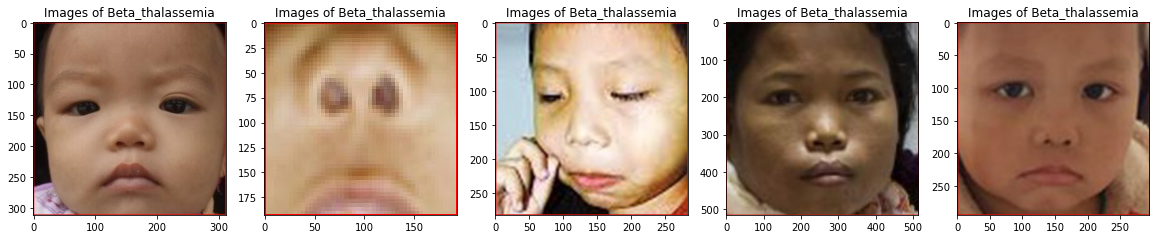

In [11]:

plt.figure(figsize=(20,20))
img_folder='dataset_faces/Beta_thalassemia'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    plt.title("Images of Beta_thalassemia")
    plt.imshow(img)

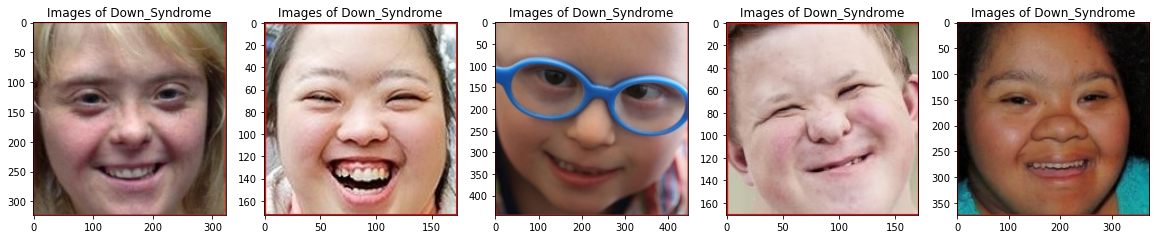

In [12]:
plt.figure(figsize=(20,20))
img_folder='dataset_faces/Down_Syndrome'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    plt.title("Images of Down_Syndrome")
    plt.imshow(img)

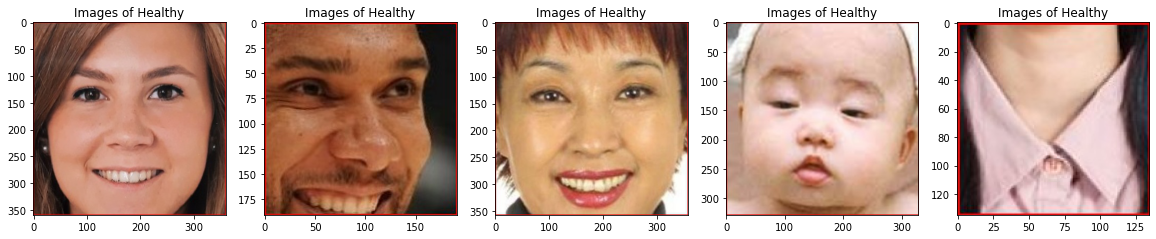

In [13]:
plt.figure(figsize=(20,20))
img_folder='dataset_faces/Healthy'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    plt.title("Images of Healthy")
    plt.imshow(img)

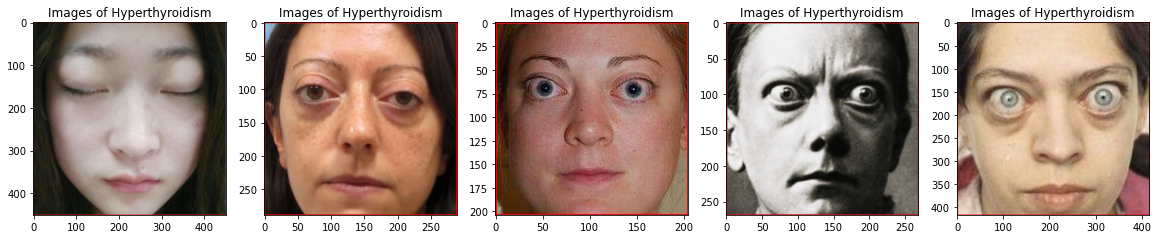

In [14]:
plt.figure(figsize=(20,20))
img_folder='dataset_faces/Hyperthyroidism'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    plt.title("Images of Hyperthyroidism")
    plt.imshow(img)

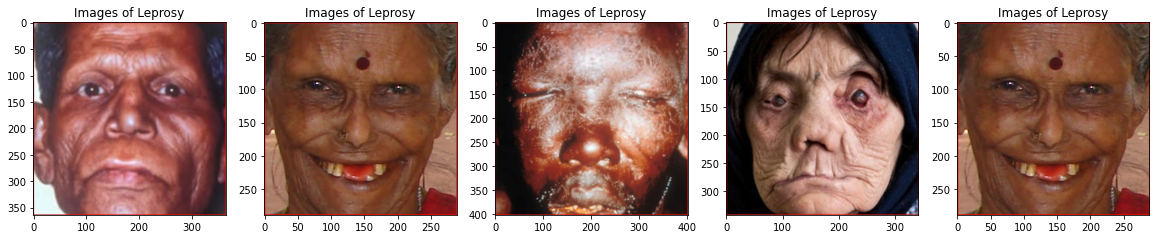

In [15]:
plt.figure(figsize=(20,20))
img_folder='dataset_faces/Leprosy'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    plt.title("Images of Leprosy")
    plt.imshow(img)

In [16]:
path= 'dataset_faces/'

labels= {'Beta_thalassemia','Down_Syndrome','Healthy','Hyperthyroidism','Leprosy'}

for i in labels:
    os.makedirs('final_data' +'/train/' + i)
    os.makedirs('final_data' +'/test/' + i)
    dest = path + '/' + i
    
    Names_of_all = os.listdir(dest)
    
    np.random.shuffle(Names_of_all)
    test_ratio = 0.25
    
    train_name, test_name = np.split(np.array(Names_of_all),
                                                      [int(len(Names_of_all)* (1 - test_ratio))])
    
    train_name = [dest+'/'+ name for name in train_name.tolist()]
    test_name = [dest+'/' + name for name in test_name.tolist()]
    
    for name in train_name:
        shutil.copy(name, 'final_data' +'/train/' + i)
    
    for name in test_name:
        shutil.copy(name, 'final_data' +'/test/' + i)

In [17]:
TD = DGEN(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest")


VD = DGEN(
        rescale=1 / 255.0)

In [18]:
TG = TD.flow_from_directory(
    directory=r"./final_data/train/",
    target_size=(110, 110),
    color_mode="rgb",
    batch_size=5,
    class_mode="categorical",
    shuffle=True,
    seed=42
)


VG = VD.flow_from_directory(
    directory=r"./final_data/test/",
    target_size=(110, 110),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 202 images belonging to 5 classes.
Found 70 images belonging to 5 classes.


In [19]:
def create_model():
    network = Sequential()
    network.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(110, 110, 3)))
    network.add(Conv2D(64, (3, 3), activation='relu'))
    network.add(BNP())
    network.add(MaxPooling2D(pool_size=(3, 3)))
    network.add(Dropout(0.25))

    network.add(Conv2D(64, (3, 3), padding="same"))
    network.add(Activation("relu"))
    network.add(BNP())

    network.add(Conv2D(64, (3, 3), padding="same"))
    network.add(Activation("relu"))
    network.add(BNP())
    network.add(MaxPooling2D(pool_size=(2, 2)))
    network.add(Dropout(0.25))

    network.add(Conv2D(128, (3, 3), padding="same"))
    network.add(Activation("relu"))
    network.add(BNP())

    network.add(Conv2D(128, (3, 3), padding="same"))
    network.add(Activation("relu"))
    network.add(BNP())
    network.add(MaxPooling2D(pool_size=(2, 2)))
    network.add(Dropout(0.25))
    network.add(Flatten())

    network.add(Dense(1024))
    network.add(Activation("relu"))
    network.add(BNP())
    network.add(Dropout(0.25))
    
    network.add(Dense(5, activation='softmax'))
    
    network.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
    return network


In [20]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 64)      18496     
                                                                 
 batch_normalization (BatchN  (None, 106, 106, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 35, 35, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 64)        3

In [21]:
step_size_train=TG.n//TG.batch_size
step_sizeval_=VG.n//VG.batch_size

In [21]:
checkpoint = ModelCheckpoint('cnn_model-{epoch:03d}.h5', 
                             verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 


history=model.fit(TG,
                    steps_per_epoch=step_size_train,
                    validation_data=VG,
                    validation_steps=step_sizeval_,
                    epochs=200,callbacks= checkpoint)

Epoch 1/200
40/40 [==============================] - ETA: 0s - loss: 2.8995 - accuracy: 0.2690
Epoch 1: val_accuracy improved from -inf to 0.28571, saving model to cnn_model-001.h5
40/40 [==============================] - 8s 173ms/step - loss: 2.8995 - accuracy: 0.2690 - val_loss: 1.6894 - val_accuracy: 0.2857
Epoch 2/200
40/40 [==============================] - ETA: 0s - loss: 2.1056 - accuracy: 0.2640
Epoch 2: val_accuracy did not improve from 0.28571
40/40 [==============================] - 7s 174ms/step - loss: 2.1056 - accuracy: 0.2640 - val_loss: 4.6983 - val_accuracy: 0.1857
Epoch 3/200
40/40 [==============================] - ETA: 0s - loss: 2.1954 - accuracy: 0.2944
Epoch 3: val_accuracy did not improve from 0.28571
40/40 [==============================] - 7s 173ms/step - loss: 2.1954 - accuracy: 0.2944 - val_loss: 3.3117 - val_accuracy: 0.2429
Epoch 4/200
40/40 [==============================] - ETA: 0s - loss: 1.8572 - accuracy: 0.3655
Epoch 4: val_accuracy improved from 0.2

Epoch 30/200
40/40 [==============================] - ETA: 0s - loss: 1.4306 - accuracy: 0.4822
Epoch 30: val_accuracy did not improve from 0.45714
40/40 [==============================] - 7s 175ms/step - loss: 1.4306 - accuracy: 0.4822 - val_loss: 2.4856 - val_accuracy: 0.3286
Epoch 31/200
40/40 [==============================] - ETA: 0s - loss: 1.7030 - accuracy: 0.3858
Epoch 31: val_accuracy did not improve from 0.45714
40/40 [==============================] - 7s 177ms/step - loss: 1.7030 - accuracy: 0.3858 - val_loss: 2.4508 - val_accuracy: 0.4286
Epoch 32/200
40/40 [==============================] - ETA: 0s - loss: 1.4718 - accuracy: 0.4619
Epoch 32: val_accuracy did not improve from 0.45714
40/40 [==============================] - 6s 161ms/step - loss: 1.4718 - accuracy: 0.4619 - val_loss: 3.5494 - val_accuracy: 0.2571
Epoch 33/200
40/40 [==============================] - ETA: 0s - loss: 1.4521 - accuracy: 0.4467
Epoch 33: val_accuracy did not improve from 0.45714
40/40 [========

40/40 [==============================] - ETA: 0s - loss: 1.2456 - accuracy: 0.5279
Epoch 88: val_accuracy did not improve from 0.55714
40/40 [==============================] - 7s 166ms/step - loss: 1.2456 - accuracy: 0.5279 - val_loss: 1.6038 - val_accuracy: 0.4429
Epoch 89/200
40/40 [==============================] - ETA: 0s - loss: 1.0503 - accuracy: 0.5990
Epoch 89: val_accuracy did not improve from 0.55714
40/40 [==============================] - 7s 174ms/step - loss: 1.0503 - accuracy: 0.5990 - val_loss: 1.6578 - val_accuracy: 0.5000
Epoch 90/200
40/40 [==============================] - ETA: 0s - loss: 1.2066 - accuracy: 0.5025
Epoch 90: val_accuracy did not improve from 0.55714
40/40 [==============================] - 7s 175ms/step - loss: 1.2066 - accuracy: 0.5025 - val_loss: 3.5754 - val_accuracy: 0.2571
Epoch 91/200
40/40 [==============================] - ETA: 0s - loss: 1.4923 - accuracy: 0.4619
Epoch 91: val_accuracy did not improve from 0.55714
40/40 [=====================

40/40 [==============================] - ETA: 0s - loss: 1.0461 - accuracy: 0.5685
Epoch 146: val_accuracy did not improve from 0.57143
40/40 [==============================] - 7s 165ms/step - loss: 1.0461 - accuracy: 0.5685 - val_loss: 1.9084 - val_accuracy: 0.4714
Epoch 147/200
40/40 [==============================] - ETA: 0s - loss: 1.0868 - accuracy: 0.5888
Epoch 147: val_accuracy did not improve from 0.57143
40/40 [==============================] - 7s 183ms/step - loss: 1.0868 - accuracy: 0.5888 - val_loss: 1.8760 - val_accuracy: 0.4571
Epoch 148/200
40/40 [==============================] - ETA: 0s - loss: 1.0909 - accuracy: 0.5838
Epoch 148: val_accuracy did not improve from 0.57143
40/40 [==============================] - 7s 180ms/step - loss: 1.0909 - accuracy: 0.5838 - val_loss: 1.7932 - val_accuracy: 0.4429
Epoch 149/200
40/40 [==============================] - ETA: 0s - loss: 1.0763 - accuracy: 0.5685
Epoch 149: val_accuracy did not improve from 0.57143
40/40 [==============

In [22]:
def loss_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.show()
    
    plt.figure()
    plt.gcf().clear()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.show()

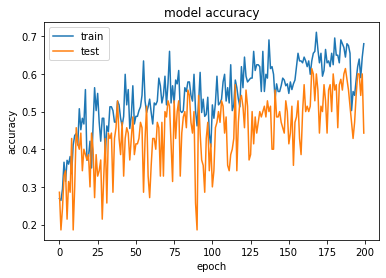

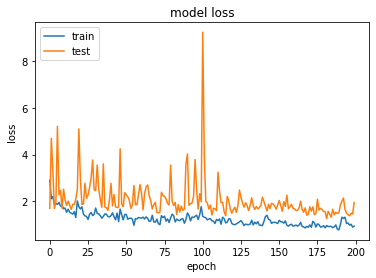

In [23]:
loss_acc(history)

In [23]:
STEP_SIZE_TEST=VG.n//VG.batch_size
VG.reset()

pred=model.predict(VG,steps=STEP_SIZE_TEST,verbose=1)

70/70 [==============================] - 1s 12ms/step


In [24]:
predicted_class_indices=np.argmax(pred,axis=1)

In [25]:
predicted_class_indices

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [26]:
labels= VG.classes

In [27]:
print(CR(labels, predicted_class_indices))

              precision    recall  f1-score   support

           0       0.21      1.00      0.35        15
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00         8

    accuracy                           0.21        70
   macro avg       0.04      0.20      0.07        70
weighted avg       0.05      0.21      0.08        70



# Transfer learning model like VGG16

In [28]:

IMAGE_SIZE = [110, 110]  

vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x=Dense(units=4096,activation="relu") (x)
x=Dense(units=4096,activation="relu") (x)
x= Dense(5, activation = 'softmax')(x)  

model = Model(inputs = vgg.input, outputs = x)

opt = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

58889256/58889256 [==============================] - 30s 1us/step


In [32]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 110, 110, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 110, 110, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 55, 55, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 55, 55, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 55, 55, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 27, 27, 128)       0     

In [29]:
history=model.fit(TG,
                    validation_data = VG,
                    steps_per_epoch = step_size_train,
                    validation_steps = step_sizeval_,
                    epochs=200, callbacks= checkpoint)

NameError: name 'checkpoint' is not defined

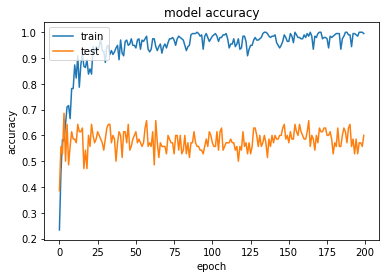

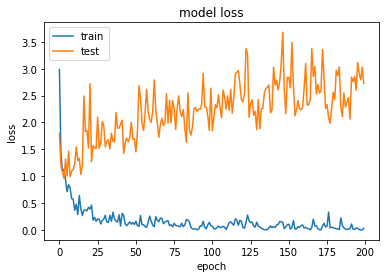

In [34]:
loss_acc(history)

In [ ]:
STEP_SIZE_TEST=VG.n//VG.batch_size
VG.reset()

pred=model.predict(VG,steps=STEP_SIZE_TEST,verbose=1)

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
predicted_class_indices

In [38]:
labels= VG.classes

In [39]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4])

In [40]:
class_names= {'Beta_thalassemia','Down_Syndrome','Healthy','Hyperthyroidism','Leprosy'}

print(CR(labels, predicted_class_indices, target_names=class_names))

                  precision    recall  f1-score   support

         Healthy       0.56      0.60      0.58        15
 Hyperthyroidism       0.67      0.80      0.73        15
Beta_thalassemia       0.50      0.47      0.48        17
         Leprosy       0.62      0.53      0.57        15
   Down_Syndrome       0.71      0.62      0.67         8

        accuracy                           0.60        70
       macro avg       0.61      0.61      0.61        70
    weighted avg       0.60      0.60      0.60        70



# Hybrid algorithms

## VGG 16 with random forest

In [41]:
IMAGE_SIZE = [110, 110]  

VGG_model = VGG16(weights='imagenet', include_top=False, input_shape = IMAGE_SIZE + [3])


for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary() 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 110, 110, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 110, 110, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 55, 55, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 55, 55, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 55, 55, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 27, 27, 128)       0     

In [42]:
feature_extractor=VGG_model.predict(TG)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features

41/41 [==============================] - 4s 90ms/step


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight="balanced")



In [44]:
rf_model.fit(X_for_RF, TG.classes)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [45]:
X_test_feature = VGG_model.predict(VG)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction_RF = rf_model.predict(X_test_features)

70/70 [==============================] - 2s 25ms/step


In [46]:
prediction_RF

array([0, 0, 2, 4, 1, 1, 0, 4, 0, 2, 2, 1, 0, 3, 2, 1, 1, 3, 2, 1, 2, 1,
       3, 3, 1, 0, 2, 2, 2, 1, 0, 0, 4, 2, 4, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 1, 4, 3, 2, 4, 3, 0, 1, 4, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2,
       0, 1, 2, 2])

In [48]:
labels= VG.classes


print(CR(labels, prediction_RF, target_names=class_names))

                  precision    recall  f1-score   support

         Healthy       0.28      0.33      0.30        15
 Hyperthyroidism       0.38      0.40      0.39        15
Beta_thalassemia       0.26      0.35      0.30        17
         Leprosy       0.33      0.13      0.19        15
   Down_Syndrome       0.00      0.00      0.00         8

        accuracy                           0.27        70
       macro avg       0.25      0.24      0.24        70
    weighted avg       0.27      0.27      0.26        70



## VGG16 with SVM

# Hybrid algorithms

## VGG 16 with random forest

In [49]:
IMAGE_SIZE = [110, 110]  

VGG_model = VGG16(weights='imagenet', include_top=False, input_shape = IMAGE_SIZE + [3])


for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary() 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 110, 110, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 110, 110, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 55, 55, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 55, 55, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 55, 55, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 27, 27, 128)       0     

In [50]:
feature_extractor=VGG_model.predict(TG)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features

41/41 [==============================] - 4s 92ms/step


# Hybrid algorithms

## VGG 16 with random forest

In [51]:
IMAGE_SIZE = [110, 110]  

VGG_model = VGG16(weights='imagenet', include_top=False, input_shape = IMAGE_SIZE + [3])


for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary() 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 110, 110, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 110, 110, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 110, 110, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 55, 55, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 55, 55, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 55, 55, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 27, 27, 128)       0     

In [52]:
feature_extractor=VGG_model.predict(TG)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features

41/41 [==============================] - 4s 91ms/step


In [53]:
from sklearn import svm

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
rbf.fit(X_for_RF, TG.classes)


SVC(C=0.1, gamma=0.5)

In [54]:
poly = svm.SVC(kernel='poly', degree=3, C=1)
poly.fit(X_for_RF, TG.classes)

SVC(C=1, kernel='poly')

In [55]:
prediction_rbf = rbf.predict(X_test_features)
prediction_poly = poly.predict(X_test_features)

In [56]:
print(CR(labels, prediction_rbf,target_names=class_names))

                  precision    recall  f1-score   support

         Healthy       0.00      0.00      0.00        15
 Hyperthyroidism       0.00      0.00      0.00        15
Beta_thalassemia       0.24      1.00      0.39        17
         Leprosy       0.00      0.00      0.00        15
   Down_Syndrome       0.00      0.00      0.00         8

        accuracy                           0.24        70
       macro avg       0.05      0.20      0.08        70
    weighted avg       0.06      0.24      0.09        70



In [57]:
print(CR(labels, prediction_poly,target_names=class_names))

                  precision    recall  f1-score   support

         Healthy       0.33      0.20      0.25        15
 Hyperthyroidism       0.17      0.07      0.10        15
Beta_thalassemia       0.20      0.59      0.29        17
         Leprosy       0.00      0.00      0.00        15
   Down_Syndrome       0.00      0.00      0.00         8

        accuracy                           0.20        70
       macro avg       0.14      0.17      0.13        70
    weighted avg       0.15      0.20      0.15        70



# VGG16 with logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial',max_iter=500)
model.fit(X_for_RF, TG.classes)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [59]:
prediction_lr = model.predict(X_test_features)
print(CR(labels, prediction_lr,target_names=class_names))

                  precision    recall  f1-score   support

         Healthy       0.18      0.13      0.15        15
 Hyperthyroidism       0.36      0.27      0.31        15
Beta_thalassemia       0.14      0.18      0.15        17
         Leprosy       0.11      0.07      0.08        15
   Down_Syndrome       0.29      0.62      0.40         8

        accuracy                           0.21        70
       macro avg       0.22      0.25      0.22        70
    weighted avg       0.21      0.21      0.20        70



# EfficientNetB3

In [60]:
efnet = effnet.EfficientNetB3(
    weights='imagenet',
    input_shape=(32,32,3),
    include_top=False,
    pooling='max'
)

model_efnet = Sequential()
model_efnet.add(efnet)
model_efnet.add(Dense(units = 140, activation='relu'))
model_efnet.add(Dense(units = 140, activation = 'relu'))
model_efnet.add(Dense(units = 5, activation='softmax'))
model_efnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b3 (Functional  (None, 1536)             10783528  
 )                                                               
                                                                 
 dense_5 (Dense)             (None, 120)               184440    
                                                                 
 dense_6 (Dense)             (None, 120)               14520     
                                                                 
 dense_7 (Dense)             (None, 5)                 605       
                                                                 
Total params: 10,983,093
Trainable params: 10,895,797
Non-trainable params: 87,296
_________________________________________________________________


In [61]:
model_efnet.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
history=model_efnet.fit(TG,
                    validation_data = VG,
                    steps_per_epoch = TG.n//TG.batch_size,
                    validation_steps = VG.n//VG.batch_size,
                    epochs=100)

Epoch 1/100
40/40 [==============================] - 12s 288ms/step - loss: 1.6103 - accuracy: 0.3096 - val_loss: 1.6331 - val_accuracy: 0.3286
Epoch 2/100
40/40 [==============================] - 11s 285ms/step - loss: 1.3523 - accuracy: 0.4112 - val_loss: 1.4749 - val_accuracy: 0.3714
Epoch 3/100
40/40 [==============================] - 11s 284ms/step - loss: 1.3687 - accuracy: 0.4518 - val_loss: 1.4471 - val_accuracy: 0.4286
Epoch 4/100
40/40 [==============================] - 11s 284ms/step - loss: 1.0943 - accuracy: 0.5533 - val_loss: 1.2992 - val_accuracy: 0.4429
Epoch 5/100
40/40 [==============================] - 11s 285ms/step - loss: 1.1947 - accuracy: 0.5584 - val_loss: 1.2218 - val_accuracy: 0.5143
Epoch 6/100
40/40 [==============================] - 11s 286ms/step - loss: 0.9684 - accuracy: 0.6091 - val_loss: 1.1588 - val_accuracy: 0.5143
Epoch 7/100
40/40 [==============================] - 12s 289ms/step - loss: 0.8330 - accuracy: 0.7005 - val_loss: 1.1529 - val_accuracy:

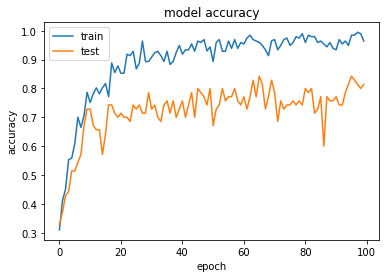

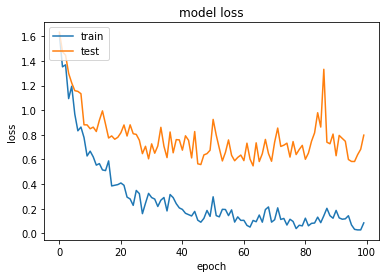

In [64]:
loss_acc(history)

In [65]:
STEP_SIZE_TEST=VG.n//VG.batch_size
VG.reset()

pred=model_efnet.predict(VG,steps=STEP_SIZE_TEST,verbose=1)

70/70 [==============================] - 4s 22ms/step


In [66]:
pred=np.argmax(pred,axis=1)

In [67]:
pred

array([0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2,
       2, 2, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 3, 0], dtype=int64)

In [68]:
label= VG.classes

In [69]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4])

In [70]:
print(CR(labels, pred,target_names=class_names))

                  precision    recall  f1-score   support

         Healthy       0.86      0.80      0.83        15
 Hyperthyroidism       0.93      0.87      0.90        15
Beta_thalassemia       0.86      0.71      0.77        17
         Leprosy       0.64      0.93      0.76        15
   Down_Syndrome       1.00      0.75      0.86         8

        accuracy                           0.81        70
       macro avg       0.86      0.81      0.82        70
    weighted avg       0.84      0.81      0.82        70

